In [1]:
import numpy as np
from openpyxl import load_workbook
from matplotlib import pyplot as plt

In [2]:
crud=load_workbook('A02_GAIN_MIN20_373.xlsx')
sheet=crud['All']

nu=[sheet['A'+repr(i+1)].value for i in range(4096)]
nu=np.asarray(nu)
gain=[sheet['B'+repr(i+1)].value for i in range(4096)]
gain=np.asarray(gain)
nu=nu/1e6 #convert frequency from Hz to MHz

nu_min=15

ii=nu>nu_min
nu=nu[ii]
gain=gain[ii]

# Classical Fit (order 5)

RMS error after fit is 0.05132115742704425


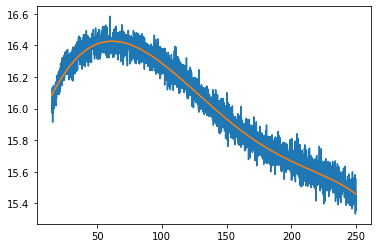

In [3]:
order=5
A=np.polynomial.polynomial.polyvander(nu,order)


#Classical Fit
lhs=A.T@A
rhs=A.T@gain
pp=np.linalg.inv(lhs)@rhs
pred_poly=A@pp

print('RMS error after fit is ' + repr(np.sqrt(np.mean( (pred_poly-gain)**2))))

plt.ion()
plt.clf()
plt.plot(nu, gain)
plt.plot(nu, pred_poly)
plt.show()

# QR Fit (order 5)

In [4]:
#QR decompostion
q, r=np.linalg.qr(A)
fitp = np.linalg.inv(r)@q.T@gain
pred = A@fitp

RMS error after fit is 0.051321157427044156


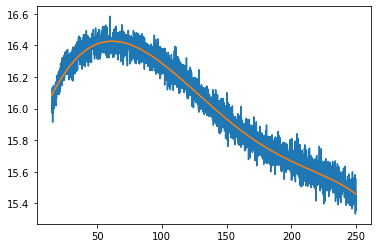

In [5]:
print('RMS error after fit is ' + repr(np.sqrt(np.mean( (pred -gain)**2))))
plt.ion()
plt.clf()
plt.plot(nu, gain)
plt.plot(nu, pred)
plt.show()
N=np.std(gain-pred)**2

# Classical Fit (order 10)

RMS error after fit is 0.44972087013184686


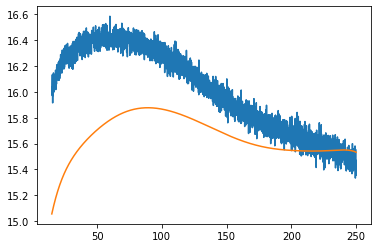

In [6]:
order= 10
A=np.polynomial.polynomial.polyvander(nu,order)


#Classical Fit
lhs=A.T@A
rhs=A.T@gain
pp=np.linalg.inv(lhs)@rhs
pred_poly=A@pp

print('RMS error after fit is ' + repr(np.sqrt(np.mean( (pred_poly-gain)**2))))

plt.ion()
plt.clf()
plt.plot(nu, gain)
plt.plot(nu, pred_poly)
plt.show()

# QR Fit (order 10)

We will see that when the order of the polynomial goes higer, the classical fit no longer works well. On the other hand, QR fit stays stable.

In [7]:
#QR decompostion
q, r=np.linalg.qr(A)
fitp = np.linalg.inv(r)@q.T@gain
pred = A@fitp

RMS error after fit is 0.05039899502921264


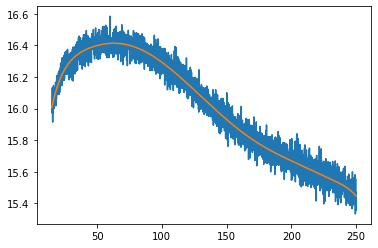

In [8]:
print('RMS error after fit is ' + repr(np.sqrt(np.mean( (pred -gain)**2))))
plt.ion()
plt.clf()
plt.plot(nu, gain)
plt.plot(nu, pred)
plt.show()
N=np.std(gain-pred)**2